In [1]:
# libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# reading dataset

df = pd.read_csv('/home/pedro/Desktop/covid/influd_5may/INFLU20-04052020.csv',sep=';',encoding = "ISO-8859-1")

# Selecting people from South Center with COVID-19
df = df[df['PCR_SARS2']==1][(df['SG_UF_NOT']=='SP') | (df['SG_UF_NOT']=='RJ')| (df['SG_UF_NOT']=='RS')\
| (df['SG_UF_NOT']=='SC')| (df['SG_UF_NOT']=='DF')| (df['SG_UF_NOT']=='ES')| (df['SG_UF_NOT']=='PR')\
| (df['SG_UF_NOT']=='MG')| (df['SG_UF_NOT']=='MS')| (df['SG_UF_NOT']=='GO')| (df['SG_UF_NOT']=='MT')]\
[df['CS_RACA']!=9.0][df['CS_RACA'].notna()][df['HOSPITAL']==1]




# Selecting people from North Northeast with COVID-19
#df = df[df['PCR_SARS2']==1][(df['SG_UF_NOT']=='RO') | (df['SG_UF_NOT']=='TO')| (df['SG_UF_NOT']=='RN')\
#| (df['SG_UF_NOT']=='PE')| (df['SG_UF_NOT']=='AM')| (df['SG_UF_NOT']=='SE')| (df['SG_UF_NOT']=='CE')\
#| (df['SG_UF_NOT']=='PB')| (df['SG_UF_NOT']=='BA')| (df['SG_UF_NOT']=='RR')| (df['SG_UF_NOT']=='AC')\
#| (df['SG_UF_NOT']=='PA')| (df['SG_UF_NOT']=='AL')| (df['SG_UF_NOT']=='PI')| (df['SG_UF_NOT']=='MA')
#| (df['SG_UF_NOT']=='AP')][df['CS_RACA']!=9.0][df['CS_RACA'].notna()][df['HOSPITAL']==1]


#print('confirmed data in North Northeast:',df.shape[0])
print('confirmed data in South Center:',df.shape[0])

/home/pedro/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (18,61,62,63,105,107,123,132,136) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


confirmed data in South Center: 9278


/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/pedro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [3]:
# comorbidities
df = df[['CS_RACA','EVOLUCAO','FEBRE','TOSSE','GARGANTA','DISPNEIA','DESC_RESP','SATURACAO','DIARREIA','VOMITO']]



In [4]:
# replacing values
df = df.fillna(0)
df.iloc[:,2:] = df.iloc[:,2:].replace([9,2], 0)



In [5]:
# adding symptoms

df['sum_symptoms'] = df.iloc[:,2:].sum(axis=1)


In [6]:
white = df['sum_symptoms'][((df['CS_RACA'] == 1)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
black = df['sum_symptoms'][((df['CS_RACA'] == 2)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
yellow = df['sum_symptoms'][((df['CS_RACA'] == 3)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)
brown = df['sum_symptoms'][((df['CS_RACA'] == 4)& ((df['EVOLUCAO']==1) |(df['EVOLUCAO']==2)))].value_counts().sort_index(ascending=True)


In [7]:
# Death and cured people

white_dea = df['sum_symptoms'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
black_dea = df['sum_symptoms'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
yellow_dea = df['sum_symptoms'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)
brown_dea = df['sum_symptoms'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==2))].value_counts().sort_index(ascending=True)


white_cur = df['sum_symptoms'][((df['CS_RACA'] == 1)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
black_cur = df['sum_symptoms'][((df['CS_RACA'] == 2)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
yellow_cur = df['sum_symptoms'][((df['CS_RACA'] == 3)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)
brown_cur = df['sum_symptoms'][((df['CS_RACA'] == 4)&(df['EVOLUCAO']==1))].value_counts().sort_index(ascending=True)

# 2  = death   1 = cure

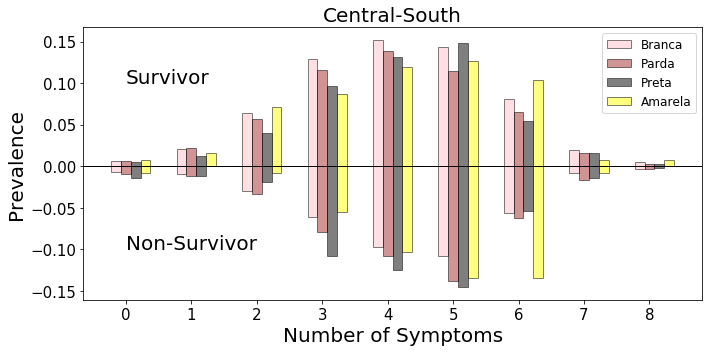

In [8]:
# Plotting the graphic


barWidth = 0.15

plt.figure(figsize=(10,5))
plt.bar(white_cur.index-0.15, white_cur/white.sum(), color='pink', alpha =0.5, width=barWidth, edgecolor='black')
plt.bar(brown_cur.index , brown_cur/brown.sum(), color='brown', alpha =0.5, width=barWidth, edgecolor='black')
plt.bar(black_cur.index+ 0.15, black_cur/black.sum() , color='black', alpha =0.5, width=barWidth, edgecolor='black')
plt.bar(yellow_cur.index + 0.30, yellow_cur/yellow.sum() ,color='yellow', alpha =0.5, width=barWidth, edgecolor='black')

plt.bar(white_dea.index-0.15, -white_dea/white.sum(), color='pink', alpha =0.5, width=barWidth, edgecolor='black', label='Branca')
plt.bar(brown_dea.index,  -brown_dea/brown.sum(), color='brown', alpha =0.5, width=barWidth, edgecolor='black', label='Parda')
plt.bar(black_dea.index+ 0.15, -black_dea/black.sum() , color='black', alpha =0.5, width=barWidth, edgecolor='black', label='Preta')
plt.bar(yellow_dea.index + 0.30, -yellow_dea/yellow.sum() ,color='yellow', alpha =0.5, width=barWidth, edgecolor='black', label='Amarela')


plt.ylabel('Prevalence', fontsize=20)
plt.xlabel('Number of Symptoms', fontsize=20)
plt.xticks(np.arange(9),['0','1','2','3','4','5','6','7','8'],fontsize=15)
plt.yticks(fontsize=15)
plt.title('Central-South', fontsize=20)
plt.text(0, 0.1, 'Survivor', fontsize=20)
plt.text(0, -0.1, 'Non-Survivor', fontsize=20)
plt.axhline(y=0,linewidth=1,color='k')

plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('south_symptoms.pdf')
#plt.savefig('north_symptoms.pdf')
plt.show()


plt.show()